In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cholera = pd.read_csv('../data/cholera-dataset.csv', index_col = 0)

In [3]:
cholera.sample(5)

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
235,51,Male,0,140,299.0,0,1,173,1,2,0,0,0
63,41,Male,1,135,203.0,0,1,132,0,1,0,0,1
56,48,Male,0,122,222.0,0,0,186,0,2,0,0,1
119,46,Female,0,138,243.0,0,0,152,1,1,0,0,1
7,44,Male,1,120,263.0,0,1,173,0,2,0,0,1


In [4]:
cholera.dtypes

age             int64
sex            object
dh              int64
rbp             int64
c             float64
seizures        int64
vc              int64
ga              int64
bt0             int64
fc              int64
exposed_to      int64
fever           int64
cholera         int64
dtype: object

In [5]:
cholera.isnull().sum()

age           0
sex           0
dh            0
rbp           0
c             5
seizures      0
vc            0
ga            0
bt0           0
fc            0
exposed_to    0
fever         0
cholera       0
dtype: int64

In [6]:
cholera.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 13 columns):
age           303 non-null int64
sex           303 non-null object
dh            303 non-null int64
rbp           303 non-null int64
c             298 non-null float64
seizures      303 non-null int64
vc            303 non-null int64
ga            303 non-null int64
bt0           303 non-null int64
fc            303 non-null int64
exposed_to    303 non-null int64
fever         303 non-null int64
cholera       303 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 33.1+ KB


In [7]:
cholera[cholera['c'].isnull() == True] #NaN values on c (cholesterol levels)

,age,sex,dh,rbp,c,seizures,vc,ga,bt0,fc,exposed_to,fever,cholera
99,53,Male,2,130,NaN,1,0,173,0,2,3,0,1
134,41,Female,1,126,NaN,0,1,163,0,2,0,0,1
135,49,Female,0,130,NaN,0,1,163,0,2,0,0,1
260,66,Female,0,178,NaN,1,1,165,1,1,2,0,0
298,57,Female,0,140,NaN,0,1,123,1,1,0,0,0


We change the column name

In [8]:
cholera.rename(columns = {'dh': 'dehyd_lev', 'rbp': 'blood_pres', 'c':'cholesterol', 'vc':'vomit_col', 'ga': 'gastric_acid', 'bt0':'O_bloodtype_bool', 'fc':'fec_cons'}, inplace = True)

In [9]:
cholera.head()

,age,sex,dehyd_lev,blood_pres,cholesterol,seizures,vomit_col,gastric_acid,O_bloodtype_bool,fec_cons,exposed_to,fever,cholera
0,63,Male,3,145,233.0,1,0,150,0,0,0,0,1
1,37,Male,2,130,250.0,0,1,187,0,0,0,0,1
2,41,Female,1,130,204.0,0,0,172,0,2,0,0,1
3,56,Male,1,120,236.0,0,1,178,0,2,0,0,1
4,57,Female,0,120,354.0,0,1,163,1,2,0,0,1


In [10]:
cholera.describe()

,age,dehyd_lev,blood_pres,cholesterol,seizures,vomit_col,gastric_acid,O_bloodtype_bool,fec_cons,exposed_to,fever,cholera
count,303.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.283828,0.966997,131.623762,246.067114,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,0.006601,0.544554
std,9.872631,1.032052,17.538143,52.121415,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.081110,0.498835
min,3.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,100.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,1.000000,1.000000


In [11]:
cholera[cholera['exposed_to']==4] #It is not harmful to have different 4, but it's important to aknlowledge it.

,age,sex,dehyd_lev,blood_pres,cholesterol,seizures,vomit_col,gastric_acid,O_bloodtype_bool,fec_cons,exposed_to,fever,cholera
92,52,Male,2,138,223.0,0,1,169,0,2,4,0,1
158,58,Male,1,125,220.0,0,1,144,0,1,4,0,1
163,38,Male,2,138,175.0,0,1,173,0,2,4,0,1
164,38,Male,2,138,175.0,0,1,173,0,2,4,0,1
251,43,Male,0,132,247.0,1,0,143,1,1,4,0,0


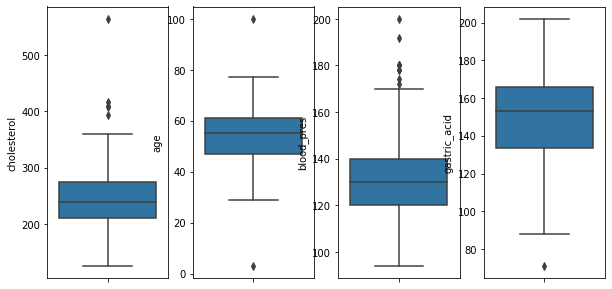

In [12]:
fig, ax = plt.subplots(1,4, figsize = (10,5))
sns.boxplot(y = cholera.cholesterol, ax=ax[0])
sns.boxplot(y = cholera.age, ax=ax[1])
sns.boxplot(y = cholera.blood_pres, ax=ax[2])
sns.boxplot(y = cholera.gastric_acid, ax = ax[3])

plt.show()
#We have found some outliers so we have decided to drop them.

In [13]:
rows_to_drop = cholera.loc[(cholera.cholesterol > 380) | (cholera.blood_pres > 170) | (cholera.gastric_acid < 80) ].copy()
rows_to_drop

,age,sex,dehyd_lev,blood_pres,cholesterol,seizures,vomit_col,gastric_acid,O_bloodtype_bool,fec_cons,exposed_to,fever,cholera
8,52,Male,2,172,199.0,1,1,162,0,2,0,0,1
28,65,Female,2,140,417.0,1,0,157,0,2,1,0,1
85,67,Female,2,115,564.0,0,0,160,0,1,0,0,1
96,62,Female,0,140,394.0,0,0,157,0,1,0,0,1
101,59,Male,3,178,270.0,0,0,145,0,0,0,0,1
110,64,Female,0,180,325.0,0,1,154,1,2,0,0,1
203,68,Male,2,180,274.0,1,0,150,1,1,0,0,0
220,63,Female,0,150,407.0,0,0,154,0,1,3,0,0
223,56,Female,0,200,288.0,1,0,133,1,0,2,0,0
241,59,Female,0,174,249.0,0,1,143,1,1,0,0,0


In [14]:
cholera.drop(rows_to_drop.index, inplace = True)

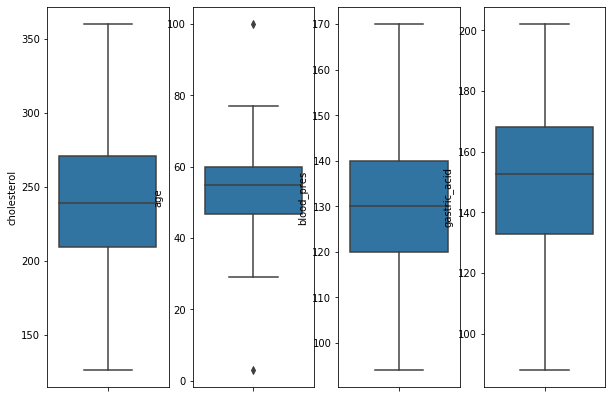

In [15]:
fig, ax = plt.subplots(1,4, figsize = (10,7))
sns.boxplot(y = cholera.cholesterol, ax=ax[0])
sns.boxplot(y = cholera.age, ax=ax[1])
sns.boxplot(y = cholera.blood_pres, ax=ax[2])
sns.boxplot(y = cholera.gastric_acid, ax = ax[3])

plt.show()

In [17]:
pd.to_csv('../data/cholera_clean.csv')

AttributeError: module 'pandas' has no attribute 'to_csv'